In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ансамбли решающих функций (классификаторов)

Два подхода:
    
* Баггинг (строим по возможности независимые классификаторы):
        - Bagging
        - Random Forests
        - ...
* Бустинг (новые классификаторы знают об ошибках других и учатся на их ошибках):
        - AdaBoost
        - Gradient Boosting
        - ...
    

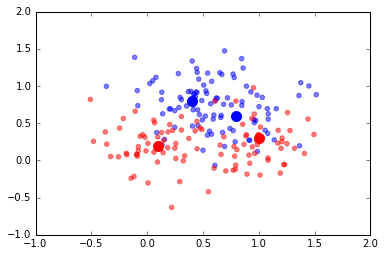

In [2]:
import mysk

X, y = mysk.generate_points(seed = 0)
mysk.draw_points(X, y)
mysk.draw_centers()

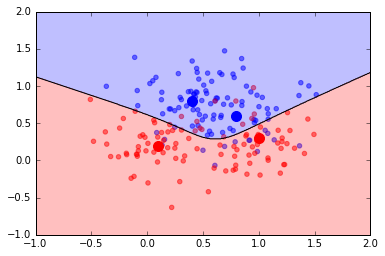

In [3]:
mysk.draw_points(X, y)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

In [4]:
X_test, y_test = mysk.generate_points(seed = 1)

## Random Forest

Random forests [Breiman, 2001]

Ансамбль параллельно обучаемых «независимых» деревьев решений.

Независимое построение определенного количества $M = {}$`n_estimators` (по умолчанию, 10) деревьев:

Генерация случайной bootstrap-подвыборки (по умолчанию, ее мощность равна $\sqrt{N}$) из обучающей выборки и построение дерева решений по данной подвыборке (в каждом
новом узле дерева переменная для разбиения выбирается не из всех признаков, а из
случайно выбранного их подмножества небольшой мощности).

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
rf_model = ExtraTreesClassifier(n_estimators=1000)
rf_model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(rf_model)
mysk.draw_bayes()

In [ ]:
err_train = np.mean(y != rf_model.predict(X))
err_test = np.mean(y_test != rf_model.predict(X_test))
print(err_train, err_test)

## AdaBoost

AdaBoost [Freund, Schapire, 1995]
(от Adaptive Boosting)

Будем использовать веса $w_1,w_2, \dots ,w_N$.

На первой итерации $w_i = 1/N$ ($i = 1, 2, \dots ,N$) и алгоритм построения $f_1$ работает в
обычном режиме.
На $m$-й итерации увеличиваются веса тех прецедентов, на которых на $(m − 1)$-й
итерации была допущена ошибка, и уменьшаются веса тех прецедентов, которые на
предыдущей итерации были классифицированы правильно.

На $m$-й итерации ищем классификатор $f_m$, минимизирующий ошибку
$$
{\rm err}_m = \sum_{f_m(x^{(i)}) \ne y^{(i)}} w_i
$$


In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

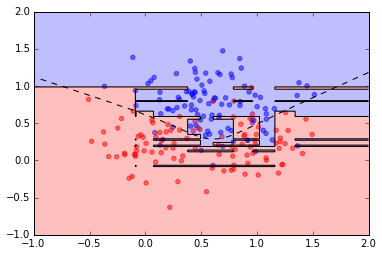

In [22]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(ada_model)
mysk.draw_bayes()

In [23]:
err_train = np.mean(y != ada_model.predict(X))
err_test = np.mean(y_test != ada_model.predict(X_test))
print(err_train, err_test)

0.065 0.26


## Gradient Boosted Trees

GBT — Gradient Boosting Trees [Friedman, 1999]

На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_model = GradientBoostingClassifier()
gbt_model.fit(X, y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

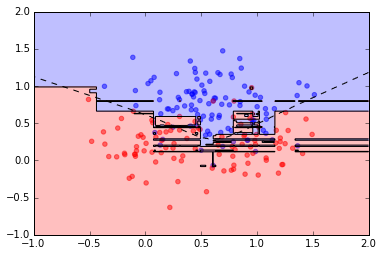

In [29]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(gbt_model)
mysk.draw_bayes()

In [27]:
err_train = np.mean(y != gbt_model.predict(X))
err_test = np.mean(y_test != gbt_model.predict(X_test))
print(err_train, err_test)

0.0 0.245
